In [1]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [2]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [3]:

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

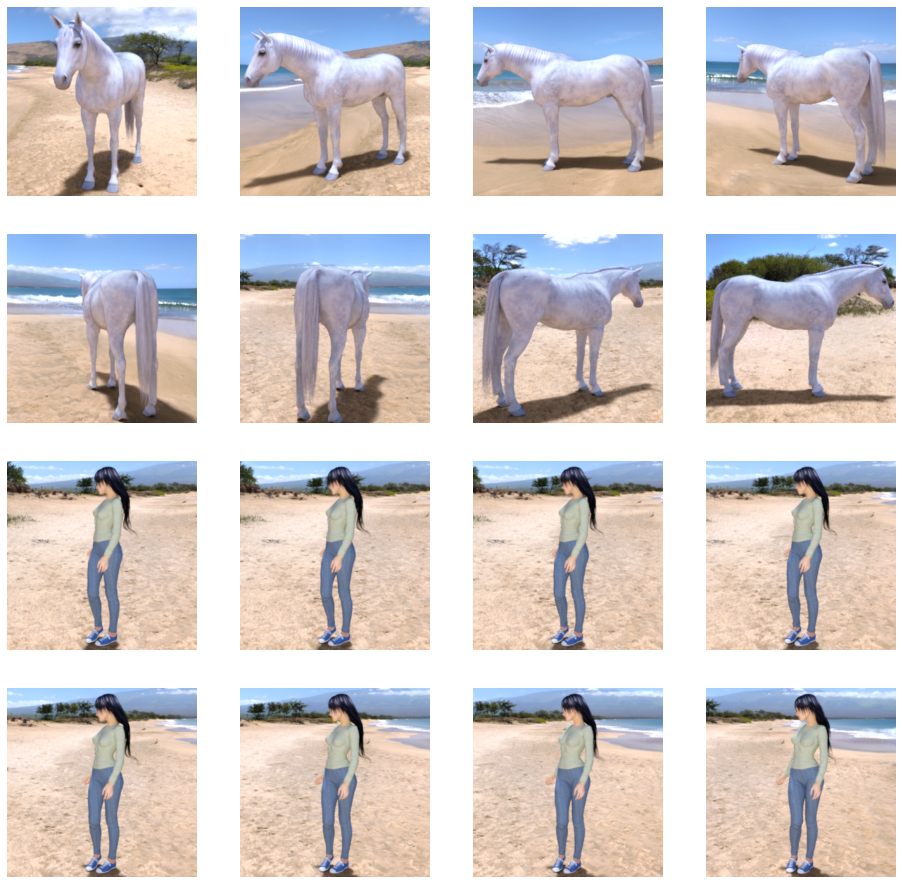

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building a Small Model from Scratch

In [10]:
from keras.models import Sequential, Model, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [13]:
inputs = Input(shape=(300, 300, 3))
# This is the first convolution
x = Conv2D(16, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(2, 2)(x)
# second
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 64)        18496 

In [17]:
from tensorflow.keras.optimizers import RMSprop

In [18]:
model.compile(loss="binary_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

## Data Preprocessing

Next step is to set up the data generators that will read pictures in the source folders, convert them to float32 tensors, and feed them (with their labels) to the model.

You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 300x300 and their labels (binary).

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_datagen = ImageDataGenerator(rescale=1/255)

In [28]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [29]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [30]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 19s 2s/step - loss: 0.7054 - accuracy: 0.6029
Epoch 2/15
8/8 [==============================] - 18s 2s/step - loss: 0.8231 - accuracy: 0.6174
Epoch 3/15
8/8 [==============================] - 17s 2s/step - loss: 0.5247 - accuracy: 0.7564
Epoch 4/15
8/8 [==============================] - 17s 2s/step - loss: 0.5613 - accuracy: 0.8287
Epoch 5/15
8/8 [==============================] - 17s 2s/step - loss: 0.5191 - accuracy: 0.8265
Epoch 6/15
8/8 [==============================] - 18s 2s/step - loss: 0.1840 - accuracy: 0.9255
Epoch 7/15
8/8 [==============================] - 20s 2s/step - loss: 0.2789 - accuracy: 0.8750
Epoch 8/15
8/8 [==============================] - 19s 2s/step - loss: 0.2127 - accuracy: 0.9189
Epoch 9/15
8/8 [==============================] - 17s 2s/step - loss: 0.1854 - accuracy: 0.9410
Epoch 10/15
8/8 [==============================] - 17s 2s/step - loss: 0.8406 - accuracy: 0.8821
Epoch 11/15
8/8 [======================

C:\Users\HOME\AppData\Local\Temp/ipykernel_15052/3905580820.py:46: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


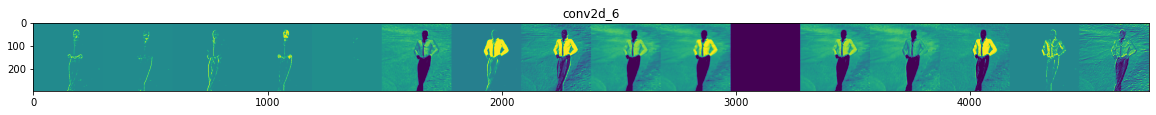

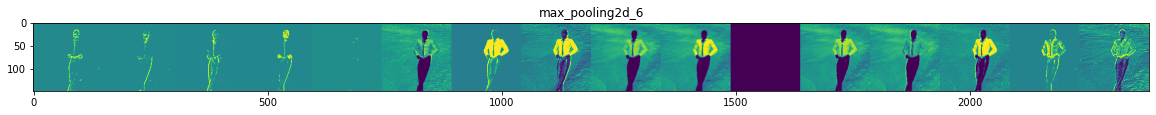

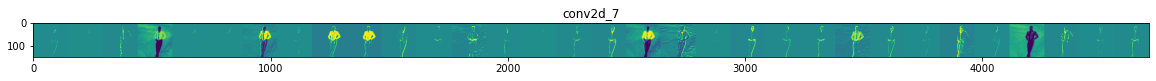

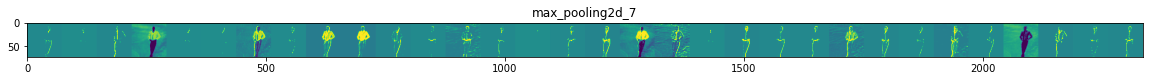

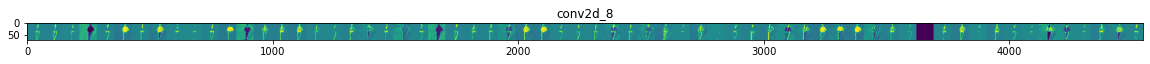

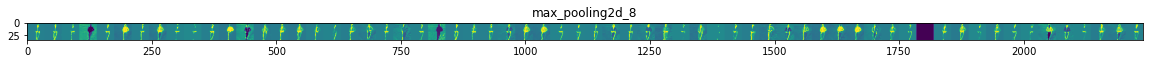

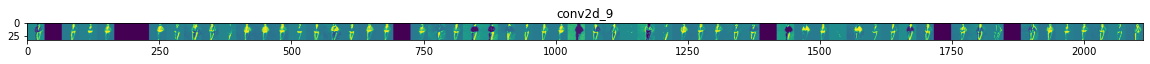

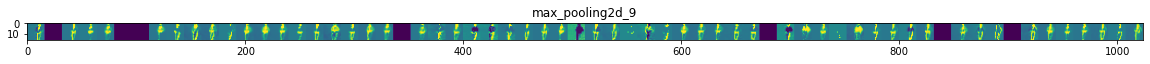

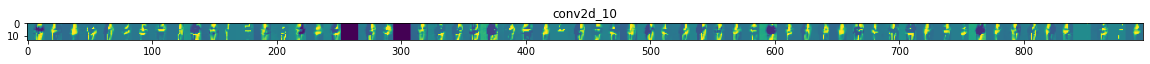

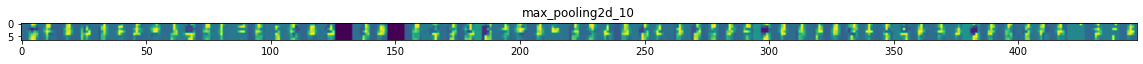

In [32]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img
import tensorflow as tf

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [40]:
successive_outputs = [layer.output for layer in model.layers[1:]]

In [41]:
visualization_model =Model(inputs= model.input, outputs=successive_outputs)

In [43]:
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
len(horse_img_files)

500

In [48]:
from glob import glob
horse_imgs = glob(os.path.join(train_horse_dir, "*png"))
len(horse_imgs), horse_imgs == horse_img_files

(500, True)

In [49]:
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

In [50]:
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

In [51]:
# Scale by 1/255
x /= 255

In [52]:
# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

In [55]:
successive_feature_maps[0].shape

(1, 298, 298, 16)

In [56]:
layer_names = [layer.name for layer in model.layers[1:]]

C:\Users\HOME\AppData\Local\Temp/ipykernel_15052/3361743370.py:16: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


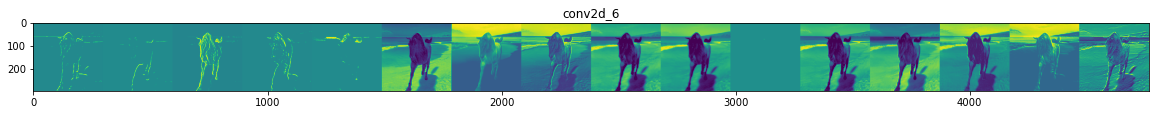

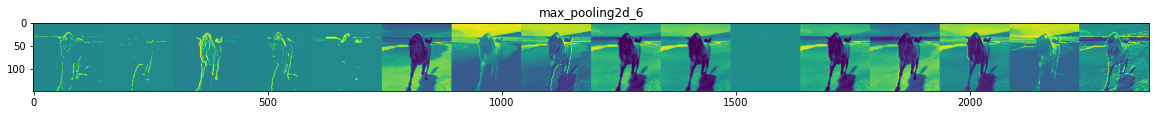

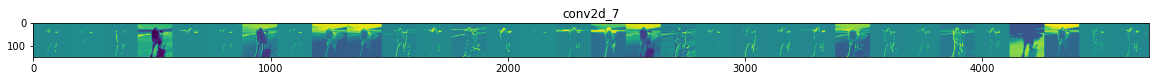

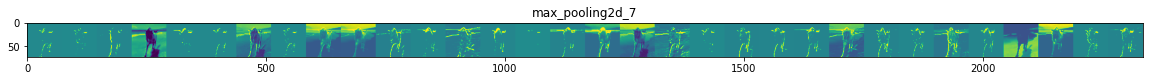

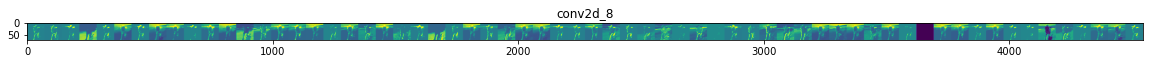

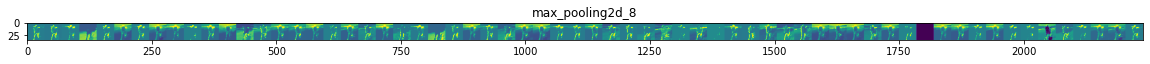

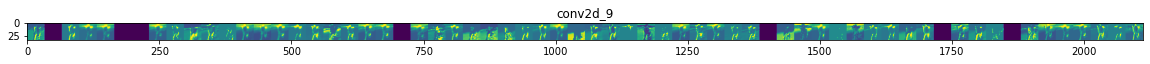

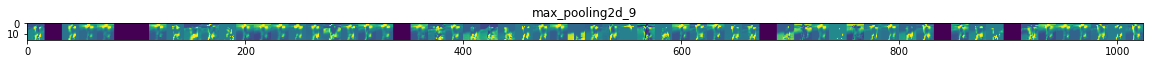

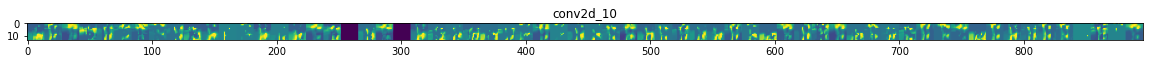

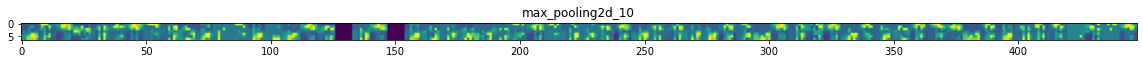

In [57]:
# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
z